In [1]:
from funcoes_arima import read_data
from funcoes_arima import arima_model_plot
from funcoes_arima import sarima_model_plot
from funcoes_arima import autoArima
from funcoes_arima import plot_diffs
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

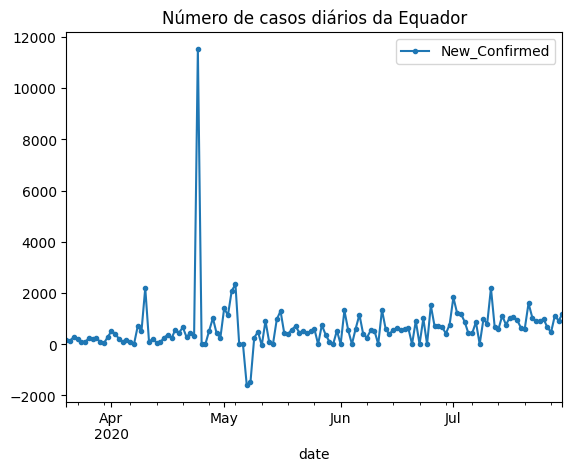

In [6]:
reg_data_ec = read_data('EC')
reg_data_ec = reg_data_ec.loc[reg_data_ec.ge(100).idxmax()[0]:]
reg_data_ec.plot(marker='.')
plt.title('Número de casos diários da Equador');

In [11]:
anomaly = reg_data_ec.query('New_Confirmed > 10_000').index
previous_dates = [anomaly.values[:][0] - np.timedelta64(i, 'D') for i in range(1, 8)]
previous_values = reg_data_ec.loc[previous_dates]
mean_previous = previous_values.mean()
reg_data_ec.loc[anomaly] = mean_previous
reg_data_ec.fillna(mean_previous, inplace=True)


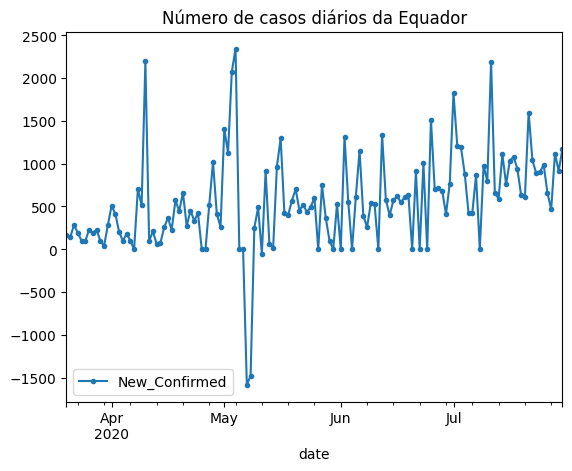

In [12]:
reg_data_ec.plot(marker='.')
plt.title('Número de casos diários da Equador');

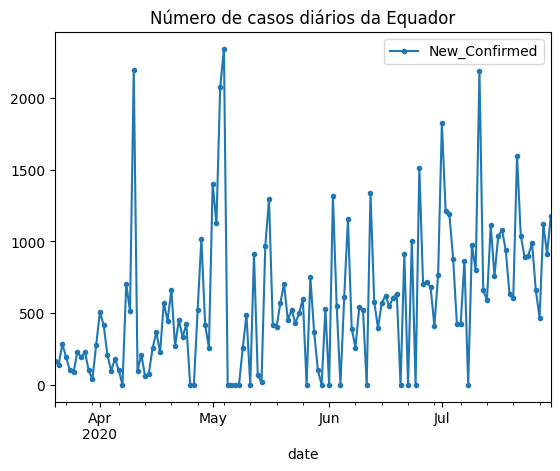

In [13]:
negatives = reg_data_ec.query('New_Confirmed < 0').index
reg_data_ec.loc[negatives] = 0
reg_data_ec.plot(marker='.')
plt.title('Número de casos diários da Equador');

In [14]:
print('Total de registros:', len(reg_data_ec))
print('Número de registros para treino:', round(len(reg_data_ec)*0.7, 0))
print('Número de registros para teste:', round(len(reg_data_ec)*0.3, 0))

Total de registros: 133
Número de registros para treino: 93.0
Número de registros para teste: 40.0


In [15]:
train_data = reg_data_ec.iloc[:88]
test_data = reg_data_ec.iloc[88:]
print('Número de registros para treino final:', len(train_data))
print('Número de registros para teste final:', len(test_data))

Número de registros para treino final: 88
Número de registros para teste final: 45


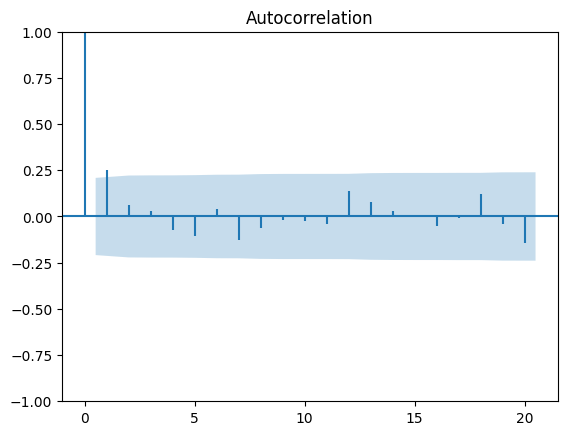

In [16]:
plot_acf(train_data['New_Confirmed'],  marker='');

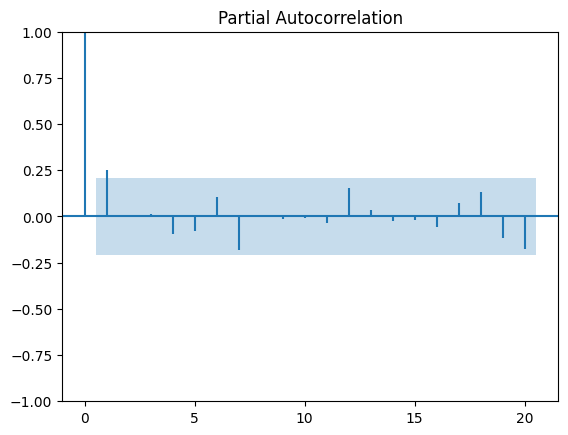

In [17]:
plot_pacf(train_data['New_Confirmed'],  marker='');

ADF Statistic 0 Order: -7.150844
p-value: 0.000000
ADF Statistic 1st Order: -6.961948
p-value: 0.000000
ADF Statistic 2nd Order: -5.310667
p-value: 0.000005
ADF Statistic 3th order: -5.314774
p-value: 0.000005


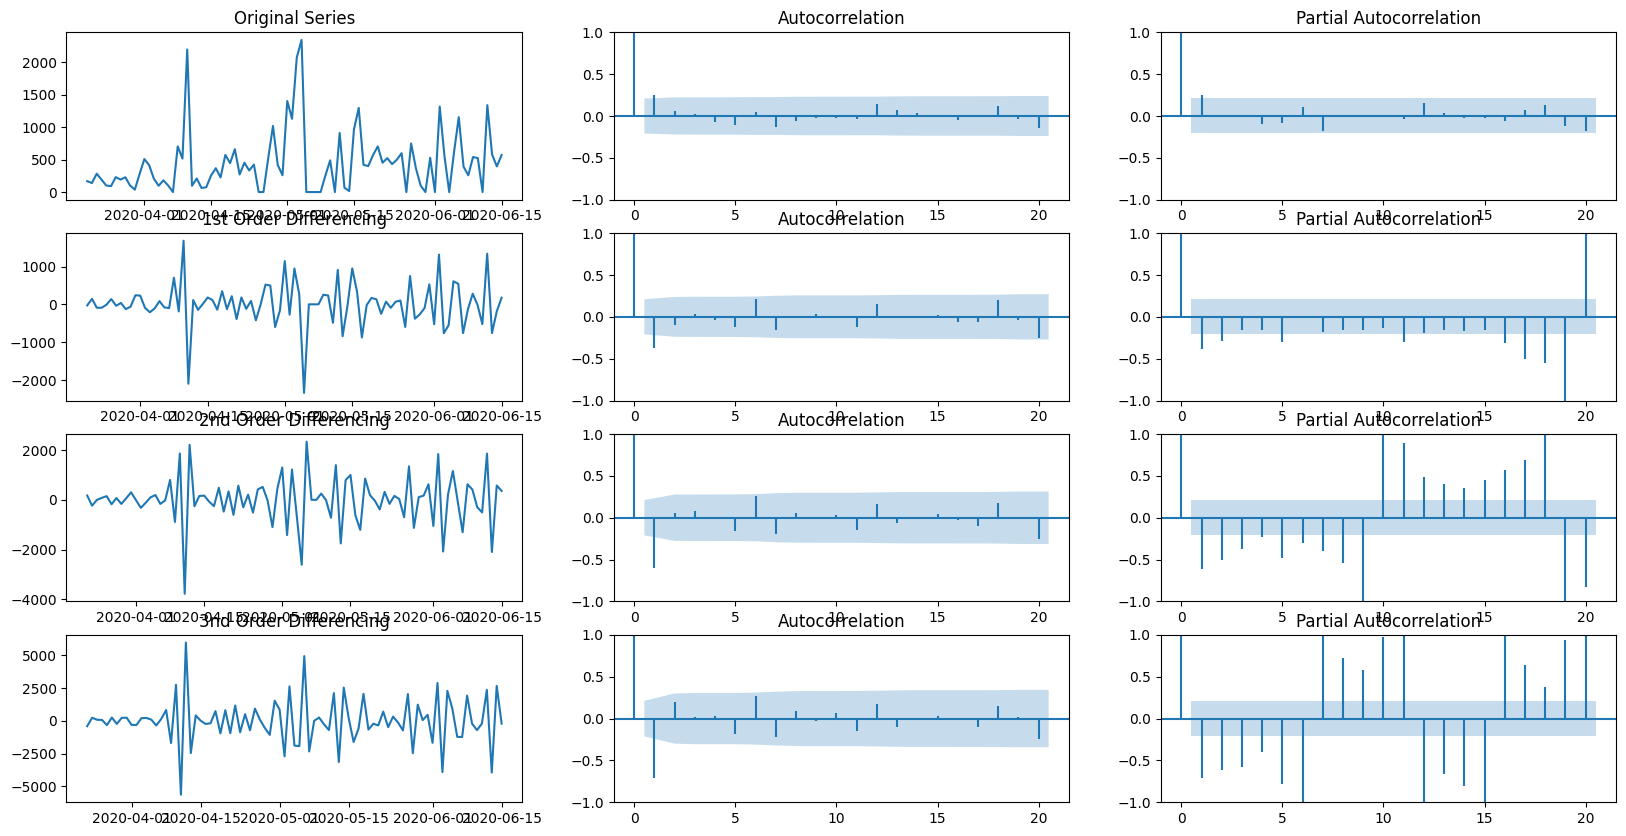

In [18]:
plot_diffs(train_data)

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   88
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -664.347
Date:                Fri, 20 Jan 2023   AIC                           1334.693
Time:                        16:34:33   BIC                           1342.125
Sample:                    03-20-2020   HQIC                          1337.688
                         - 06-15-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.4127     96.589      4.601      0.000     255.101     633.725
ar.L1          0.2484      0.064      3.868      0.000       0.123       0.374
sigma2      2.111e+05   2.78e+04      7.586      0.0

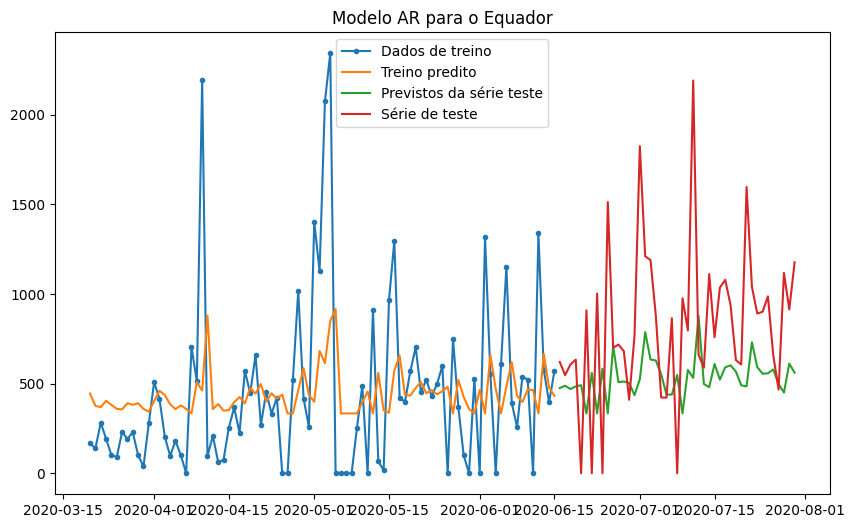

In [19]:
arima_model_plot(train_data, test_data, p=1, model_name='AR', country='Equador')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   88
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -664.492
Date:                Fri, 20 Jan 2023   AIC                           1334.984
Time:                        16:34:48   BIC                           1342.416
Sample:                    03-20-2020   HQIC                          1337.979
                         - 06-15-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.5048     91.454      4.860      0.000     265.259     623.751
ma.L1          0.2382      0.072      3.289      0.001       0.096       0.380
sigma2      2.118e+05   2.81e+04      7.538      0.0

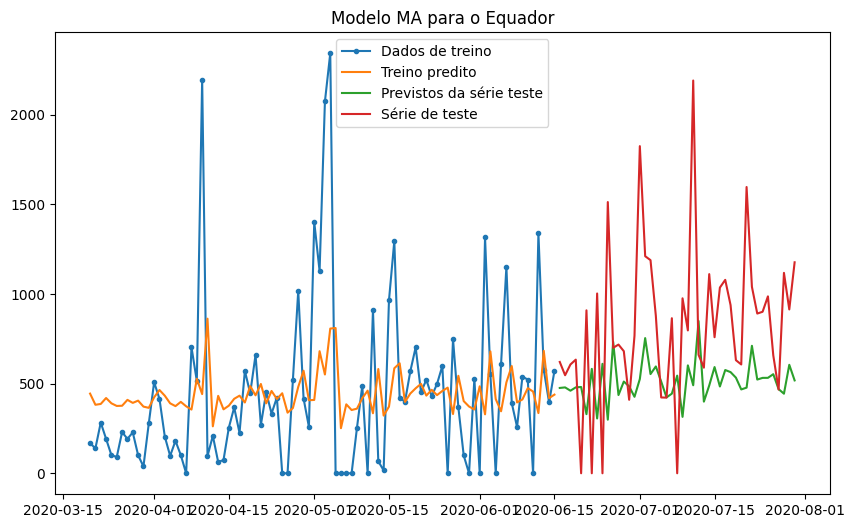

In [20]:
arima_model_plot(train_data, test_data, q=1, model_name='MA', country='Equador')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -659.240
Date:                Fri, 20 Jan 2023   AIC                           1324.480
Time:                        16:35:50   BIC                           1331.878
Sample:                    03-20-2020   HQIC                          1327.459
                         - 06-15-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2625      0.075      3.522      0.000       0.116       0.409
ma.L1         -0.9987      0.653     -1.529      0.126      -2.279       0.281
sigma2      2.141e+05   1.31e+05      1.629      0.1

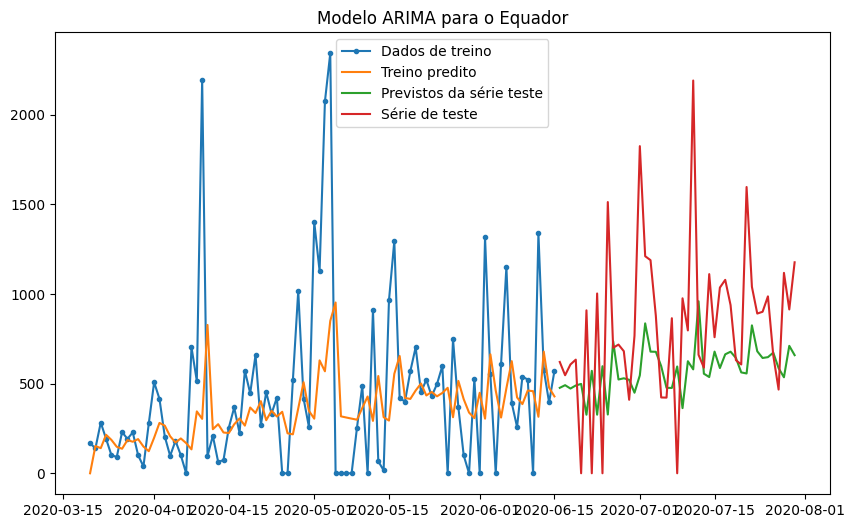

In [24]:
arima_model_plot(train_data, test_data, p=1, d=1, q=1, model_name='ARIMA', country='Equador')

In [25]:
autoArima(train_data)

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(3, 1, 1, 7),
      suppress_warnings=True, with_intercept=False)

                                     SARIMAX Results                                     
Dep. Variable:                     New_Confirmed   No. Observations:                   88
Model:             ARIMA(5, 1, 0)x(3, 1, [1], 7)   Log Likelihood                -610.930
Date:                           Fri, 20 Jan 2023   AIC                           1241.860
Time:                                   16:37:49   BIC                           1265.681
Sample:                               03-20-2020   HQIC                          1251.411
                                    - 06-15-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4672      0.091     -5.128      0.000      -0.646      -0.289
ar.L2         -0.5128      0.100     -5.142

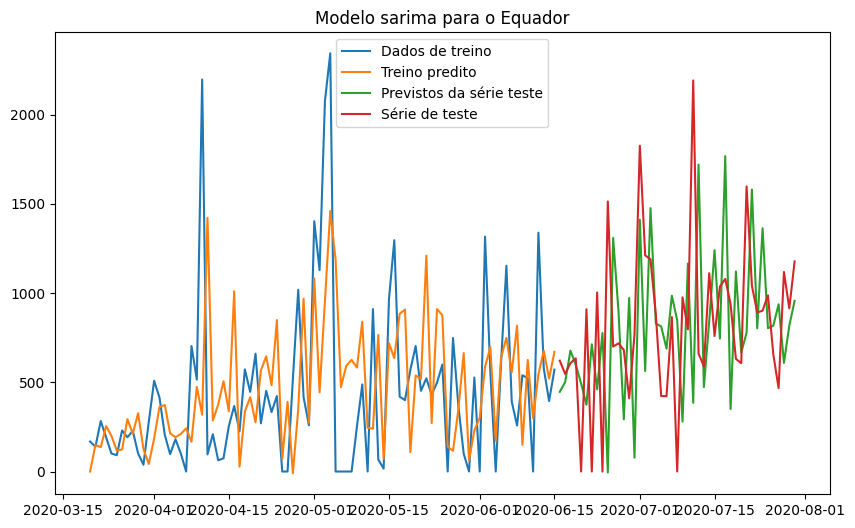

In [27]:
sarima_model_plot(train_data, test_data, p=5, d=1, q=0, P=3, D=1, Q=1, m=7, country='Equador', model_name='sarima')